SGDS (5000,)
MLE (5000,)


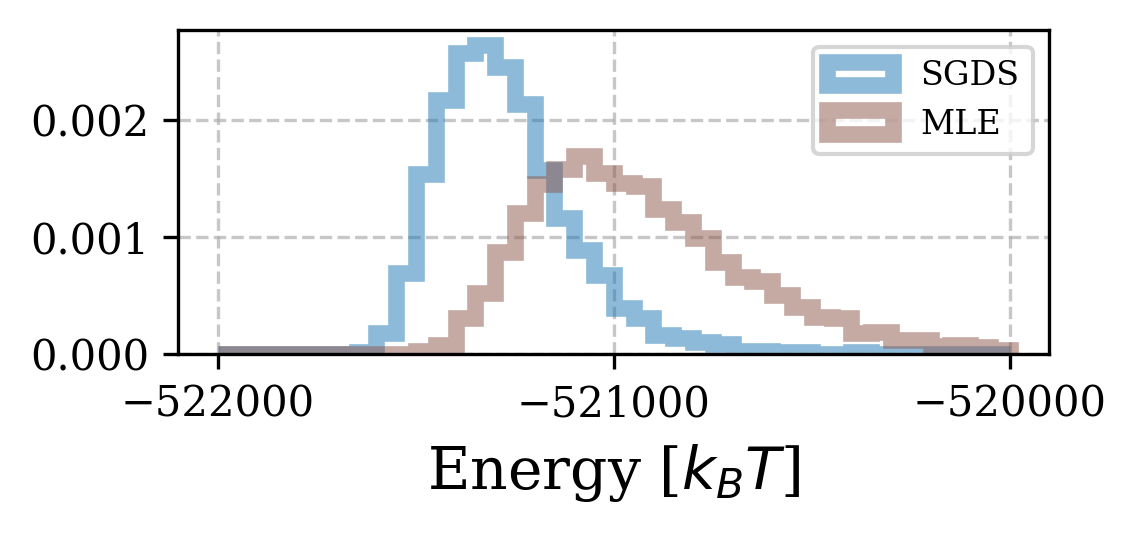

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 8,
    'figure.dpi': 300,
    'lines.linewidth': 1.5,
})

palette_dict = {
    "Reference": "#808080",   # Gray
    "SGDS": "#1F77B4",     # Blue
    "PIS": "#FF7F0E",     # Orange
    "iDEM": "#2CA02C",     # Green
    "TB+Expl+LS": "#9467BD",     # Purple
    "MLE": "#8C564B",     # Brown
    "FAB": "#E377C2",     # Pink
}

def plot_energy_hist(name, energy_dict, lower, upper):
    plt.figure(figsize=(4, 2))
    plt.xlabel("Energy [$k_B T$]")
    
    for method, energy in energy_dict.items():
        print(method, energy.shape)
        plt.hist(energy, range=(lower, upper), bins=40, density=True, label=method, alpha=0.5, histtype="step", linewidth=4, color=palette_dict[method])

    if name == 'aldp':
        plt.xticks([-522000, -521000, -520000]) 
        
    plt.grid(linestyle="--", alpha=0.7)
    plt.xticks()
    plt.yticks()
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.savefig(f'../figure/{name}_energy_hist.png', format='png', bbox_inches='tight')
    plt.savefig(f'../figure/{name}_energy_hist.pdf', format='pdf', bbox_inches='tight')

# name = 'lj13'
# energy_dict = {
#     'Reference': np.load(f'../assets/lj13/gt/energies.npy'),
#     'SGDS': np.load('../assets/lj13/ours/energies.npy'),
#     'PIS': np.load('../assets/lj13/pis/energies.npy'),
#     'iDEM': np.load(f'../assets/lj13/idem/energies.npy'),
# }

# lower = -60
# upper = -20

# name = 'lj55'
# energy_dict = {
#     'Reference': np.load(f'../assets/lj55/ref/energies.npy'),
#     'SGDS': np.load('../assets/lj55/ours/energies.npy'),
#     'PIS': np.load('../assets/lj55/pis/energies.npy'),
#     'TB+Expl+LS': np.load(f'../assets/lj55/tb_expl_ls/energies.npy'),
#     # 'iDEM': np.load(f'../assets/lj55/idem/energies.npy'),
# }

# lower = -380
# upper = -100

name = 'aldp'
energy_dict = {
    # 'Reference': np.load('../assets/aldp/gt/energies.npy'),
    # 'PIS': np.load(f'../assets/aldp/pis/energies.npy'),
    # 'TB+Expl+LS': np.load(f'../assets/aldp/tb_expl_ls/energies.npy'),
    'SGDS': np.load('../assets/aldp/ours/energies.npy'),
    'MLE': np.load('../assets/aldp/mle/energies.npy'),
    # 'FAB': np.load(f'../assets/aldp/fab/energies.npy'),
}

lower = -522000
upper = -520000

plot_energy_hist(name, energy_dict, lower, upper)

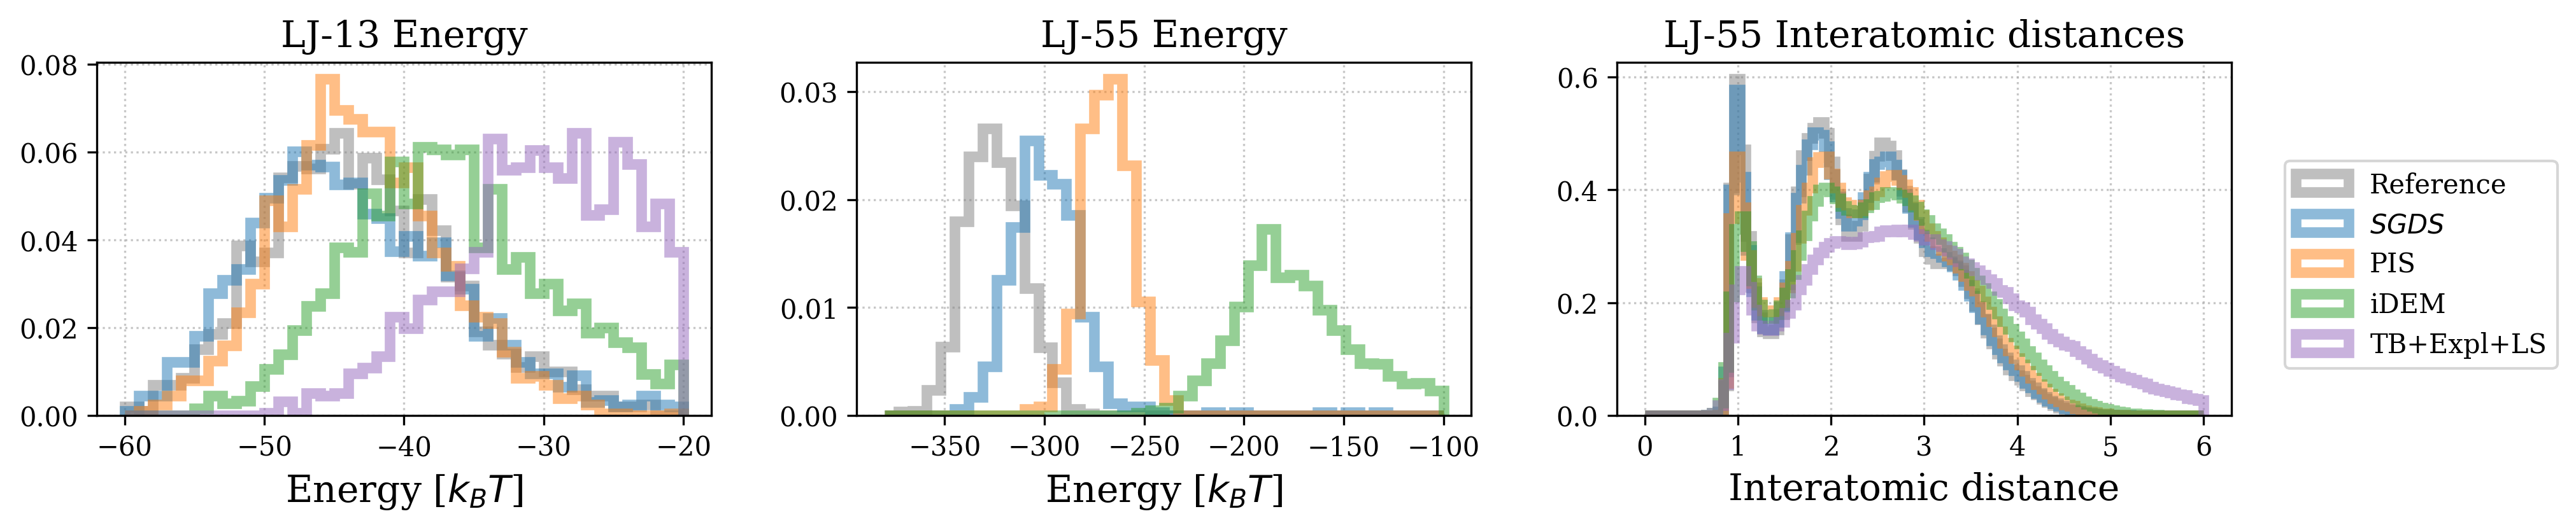

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,
    'axes.labelsize': 10,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'lines.linewidth': 1.5,
})

palette_dict = {
    "Reference":        "#808080",   # Gray
    "SGDS":      "#1F77B4",   # Blue
    "PIS":       "#FF7F0E",   # Orange
    "iDEM":      "#2CA02C",   # Green
    "TB+Expl+LS":"#9467BD",   # Purple
    "MLE":       "#8C564B",   # Brown
    "FAB":       "#E377C2",   # Pink
}

def draw_energy_histogram(ax, energy, lower, upper, name, bins=40):
    return ax.hist(
        energy,
        range=(lower, upper),
        bins=bins,
        density=True,
        label=name,
        alpha=0.5,
        histtype="step",
        linewidth=4,
        color=palette_dict[name]
    )

def draw_interatomic_dist_histogram(ax, distances, lower, upper, name, bins=100):
    return ax.hist(
        distances,
        bins=bins,
        range=(lower, upper),
        density=True,
        label=name,
        alpha=0.5,
        histtype="step",
        linewidth=4,
        color=palette_dict[name]
    )

# --- 데이터 로드 ---

# 에너지 분포
energy_data = {
    'lj13': {
        'Reference':   np.load('../assets/lj13/ref/energies.npy'),
        'SGDS': np.load('../assets/lj13/ours/energies.npy'),
        'PIS':  np.load('../assets/lj13/pis/energies.npy'),
        'iDEM': np.load('../assets/lj13/idem/energies.npy'),
        'TB+Expl+LS': np.load('../assets/lj13/tb_expl_ls/energies.npy'),
    },
    'lj55': {
        'Reference':         np.load('../assets/lj55/ref/energies.npy'),
        'SGDS':       np.load('../assets/lj55/ours/energies.npy'),
        'PIS':        np.load('../assets/lj55/pis/energies.npy'),
        'iDEM': np.load('../assets/lj55/idem/energies.npy'),
        # 'TB+Expl+LS': np.load('../assets/lj55/tb_expl_ls/energies.npy'),
    },
}

energy_limits = {
    'lj13': (-60, -20),
    'lj55': (-380, -100),
}

# 상호원자 거리 분포 (lj55)
dist_data_55 = {
    'Reference':  np.load('../assets/lj55/ref/distances.npy'),
    'SGDS':       np.load('../assets/lj55/ours/distances.npy'),
    'PIS':        np.load('../assets/lj55/pis/distances.npy'),
    'iDEM':       np.load('../assets/lj55/idem/distances.npy'),
    'TB+Expl+LS': np.load('../assets/lj55/tb_expl_ls/distances.npy'),
}
dist_limits_55 = (0, 6)

# --- 플롯 설정 ---

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# 1) lj13 에너지 히스토그램
ax = axes[0]
lower, upper = energy_limits['lj13']
for method, arr in energy_data['lj13'].items():
    draw_energy_histogram(ax, arr, lower, upper, method)
ax.set_title('LJ-13 Energy')
ax.set_xlabel("Energy [$k_B T$]")
# ax.set_ylabel("Density")
ax.grid(linestyle=":", alpha=0.7)

# 2) lj55 에너지 히스토그램
ax = axes[1]
lower, upper = energy_limits['lj55']
for method, arr in energy_data['lj55'].items():
    draw_energy_histogram(ax, arr, lower, upper, method)
ax.set_title('LJ-55 Energy')
ax.set_xlabel("Energy [$k_B T$]")
ax.grid(linestyle=":", alpha=0.7)

# 3) lj55 상호원자 거리 히스토그램
ax = axes[2]
lower, upper = dist_limits_55
for method, arr in dist_data_55.items():
    draw_interatomic_dist_histogram(ax, arr, lower, upper, method)
ax.set_title('LJ-55 Interatomic distances')
ax.set_xlabel("Interatomic distance")
ax.grid(linestyle=":", alpha=0.7)

# 공통 레전드 (오른쪽 바깥)
emphasis_methods = {"SGDS"}  # 강조할 메소드 이름을 지정합니다.
handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    for hi, li in zip(h, l):
        if li in emphasis_methods:
            li = r"$\it{" + li + "}$"
        if li not in labels:
            handles.append(hi)
            labels.append(li)

fig.legend(
    handles, labels,
    loc='center left',
    bbox_to_anchor=(1., 0.5)
)
fig.subplots_adjust(right=0.75, wspace=0.4)
plt.tight_layout()

# 저장
fig.savefig('../figure/lj_combined.png', dpi=300, bbox_inches='tight')
fig.savefig('../figure/lj_combined.pdf', dpi=300, bbox_inches='tight')


In [4]:
import numpy as np

energies = np.load('../assets/lj13/ours/energies.npy')
log_z = np.log(np.mean(np.exp(-energies), axis=0))
log_z

55.05417